In [1]:
import csv
import numpy as np
import scipy as sp
import matplotlib
from matplotlib import pyplot as plt

In [3]:
#############
## DATA IO ##
#############

def get_data(filepath):
	# Opens the file handler for the dataset file. Using variable 'f' we can access and manipulate our file anywhere in our code
	# after the next code line.
	f = open(filepath,"r")

	# Predictors Collection (or your input variable) (which in this case is just the duration of eruption)
	X = []

	# Output Response (or your output variable) (which in this case is the duration after which next eruption will occur.)
	Y = []

	# Initializing a reader generator using reader method from csv module. A reader generator takes each line from the file
	# and converts it into list of columns.
	reader = csv.reader(f)

	# Using for loop, we are able to read one row at a time.
	for row in reader:
		if row[1]!="Duration":
			X.append(float(row[1]))
			Y.append(float(row[2]))

	# Close the file once we have succesffuly stored all data into our X and Y variables.
	f.close()

	return [np.array(X),np.array(Y)]

In [4]:
#####################
## RSS Calculation ##
#####################

def RSS(x, y, beta_0, beta_1):
    rss = 0
    for i in range(x.shape[0]):
        predicted_value = (beta_0 + (beta_1 * x[i]))
        actual_value = y[i]
        rss = rss + ((predicted_value - actual_value)**2)
    return rss

In [5]:
def gradientDescentAlgorithm(x, y, learning_rate):
    
    print ("Training Linear Regression Model using Gradient Descent")
    
    maximum_iterations = 2500
    
    # This flag lets the program know wether the gradient descent algorithm has reached it's converged state which means wether 
    # the algorithm was able to find the local minima (where the slope of RSS wrt your parameters beta_0 and beta_1 is zero)
    converge_status = False
    
    # num_rows stores the number of datapoints in the current dataset provided for training.
    num_rows = x.shape[0]

    # Initial Value of parameters ((beta_0, beta_1) - for our simple linear regression case)
    beta_0 = 0
    beta_1 = 0

    # Initial Error or RSS(beta_0,beta_1) based on the initial parameter values
    error = RSS(x, y, beta_0, beta_1)
    print('Initial Value of RSS (Cost Function)=', error);
    
    # Iterate Loop
    num_iter = 0
    while not converge_status:
        # for each training sample, compute the gradient (d/d_beta j(beta))
        gradient_0 = 1.0/num_rows * sum([(beta_0 + beta_1*np.asarray([x[i]]) - y[i]) for i in range(num_rows)]) 
        gradient_1 = 1.0/num_rows * sum([(beta_0 + beta_1*np.asarray([x[i]]) - y[i])*np.asarray([x[i]]) for i in range(num_rows)])

        # Computation of new parameters according to the current gradient.
        temp0 = beta_0 - learning_rate * gradient_0
        temp1 = beta_1 - learning_rate * gradient_1
    
        # Simultaneous Update of Parameters Beta_0 and Beta_1.
        beta_0 = temp0
        beta_1 = temp1

        
        current_error = RSS(x, y, beta_0, beta_1)
        
        if num_iter % 250 == 0:
            print ('Current Value of RSS (Cost Function) based on updated values of beta_0 and beta_1 = ', current_error)
            
        error = current_error   # update error 
        num_iter = num_iter + 1  # update iter
    
        if num_iter == maximum_iterations:
            print ("Training Interrupted as Maximum number of iterations were crossed.\n\n")
            converge_status = True

    return [beta_0[0], beta_1[0]]

In [6]:
# Method to predict response variable Y (in this case interval before the next erruption) for new values of X (in this case
# duration of eruption) using the estimated coefficientsself.
# This method can predict Response variable (Y) for single as well as multiple values of X. If only a single numerical Value
# input variable (X) which in this case is Duration is passed. It will return the prediction for only that single numerical
# value. If a collection of different values for input variable (list) is passed, it will return a list of predictions
# for each input value.
# "if" statement on line number 72 takes care of understanding if the input value is singular or a list.
def predict(coef,X):
	beta_0 = coef[0]
	beta_1 = coef[1]

	fy = []
	if type(X) == list:
		for x in X:
			fy.append(beta_0 + (beta_1 * x))
		return fy

	# Our Regression Model defined using the coefficients from slr function
	Y = beta_0 + (beta_1 * X)

	return Y

In [7]:
# Visualize the data using Scatter plot of matplotlib library. A scatter plot is a plot between two continuous variables.
# and it helps us in determining the relationship between those two continuous variables.
# For more information on working of scatter plot function of matplotlib - you can visit the following url:
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
def show_scatter_plot(X,Y,coefficients = None):
	plt.scatter(X,Y,s = 2)
	plt.xlabel("Duration of Eruption (in minutes)")
	plt.ylabel("Time duration before the next eruption (in minutes)")
	if coefficients:
		x = sp.linspace(1,X[-1], 2000)
		plt.plot(x, predict(coefficients,x), linewidth=2)
	plt.show()

Training Linear Regression Model using Gradient Descent
Initial Value of RSS (Cost Function)= 1417266.0
Current Value of RSS (Cost Function) based on updated values of beta_0 and beta_1 =  [ 295688.25908061]
Current Value of RSS (Cost Function) based on updated values of beta_0 and beta_1 =  [ 9671.15585178]
Current Value of RSS (Cost Function) based on updated values of beta_0 and beta_1 =  [ 9445.82799798]
Current Value of RSS (Cost Function) based on updated values of beta_0 and beta_1 =  [ 9443.4132054]
Current Value of RSS (Cost Function) based on updated values of beta_0 and beta_1 =  [ 9443.38732656]
Current Value of RSS (Cost Function) based on updated values of beta_0 and beta_1 =  [ 9443.38704922]
Current Value of RSS (Cost Function) based on updated values of beta_0 and beta_1 =  [ 9443.38704625]
Current Value of RSS (Cost Function) based on updated values of beta_0 and beta_1 =  [ 9443.38704622]
Current Value of RSS (Cost Function) based on updated values of beta_0 and beta

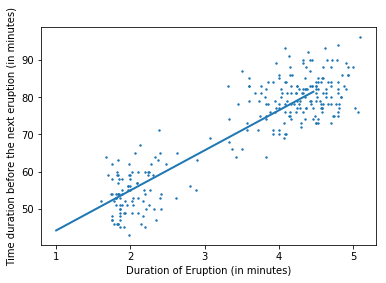

Final Values for Beta_0 and Beta_1: 33.4743970187 10.7296413962


In [ ]:
X,Y = get_data("../Datasets/geyser.csv")
# show_scatter_plot(X,Y)

################################################
## Model Training (or coefficient estimation) ##
################################################
# Using our gradient descent function we estimate coefficients of our regression line. The gradient descent function returns a list of 
# coefficients

coefficients = gradientDescentAlgorithm(X,Y,0.1)
show_scatter_plot(X,Y,coefficients)

########################
## Making Predictions ##
########################

# Using our predict function and the coefficients given by our slr function we can now predict the time it will take
# for the next eruption.
print ("Final Values for Beta_0 and Beta_1:",coefficients[0],coefficients[1])
last_eruption_duration = float(input("Duration of the last eruption (in minutes):"))
print ("Time it will take for the next eruption to occur (in minutes):",predict(coefficients,last_eruption_duration))

In [ ]:
############################
## Performance Evaluation ##
############################

print ("\n\nAccuracy Metrics of the model\n-------------------------------------")

# Calculation of RSE
RSS = 0
for idx in range(0,len(X)):
	actual_y = Y[idx]
	predicted_y = predict(coefficients,X[idx])
	RSS = RSS + ((actual_y - predicted_y)**2)
RSE = np.sqrt((1/float(len(X)-2))*RSS)

print ("Residual Standard Error:",RSE)
print ("% Residual Standard Error (over average Interval):", (RSE/np.mean(Y))*100)


# Calculation of R_Squared
TSS = 0
for idx in range(0,len(X)):
	actual_y = Y[idx]
	TSS = TSS + ((actual_y - np.mean(Y))**2)
R_Squared = ((TSS) - (RSS)) / (TSS)

print ("\nR-Squared Value:",R_Squared)